In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use('ggplot')

/home/dcarmody/Envs/ds-project3/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/dcarmody/Envs/ds-project3/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
df = pd.read_csv('SF_data/Spending_Revenue_cleaned.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [4]:
df_pp = df[df['Organization Group'] == 'Public Protection']
df_pp.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
13,1999,Spending,No,Public Protection,SHF Sheriff,San Bruno Jails,Materials & Supplies,Food,Food,General Fund,Operating,1824288.05
21,1999,Spending,No,Public Protection,ADM Gen Svcs Agency-City Admin,Medical Examiner - Medical Services,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,General Fund,Operating,85662.74
26,1999,Spending,No,Public Protection,ADP Adult Probation,Administration - Adult Probation,Materials & Supplies,Other Materials & Supplies,Other Office Supplies,General Fund,Operating,2775.30


In [5]:
df_pp['Department'].value_counts()

SHF Sheriff                       12541
POL Police                        12507
FIR Fire Department                8559
DAT District Attorney              7991
JUV Juvenile Probation             6559
DEM Emergency Management           4939
ADP Adult Probation                4096
CRT Superior Court                 3009
PDR Public Defender                1795
ADM Gen Svcs Agency-City Admin     1071
Name: Department, dtype: int64

In [8]:
df_pp_sums = df_pp.groupby(['Department'])[['Amount']].agg('sum')
df_pp_sums.columns = ['Dep_Sums_1999-2017']
df_pp_sums

,Dep_Sums_1999-2017
Department,
ADM Gen Svcs Agency-City Admin,3.658119e+07
ADP Adult Probation,3.764641e+08
CRT Superior Court,3.083808e+09
DAT District Attorney,8.784669e+08
DEM Emergency Management,2.021800e+09
FIR Fire Department,6.299810e+09
JUV Juvenile Probation,7.097967e+08
PDR Public Defender,4.196417e+08
POL Police,8.725909e+09


In [9]:
total_sum = df_pp_sums['Dep_Sums_1999-2017'].values.sum()
total_sum

25140783923.010056

In [10]:
police_sum = df_pp_sums[df_pp_sums.index == 'POL Police'].values.sum()
police_sum

8725908629.520044

In [11]:
others_sum = total_sum - police_sum

ValueError: x must be 1D

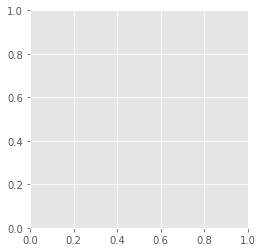

In [12]:
slices = [df_pp_sums['Dep_Sums_1999-2017'].values]
labels = df_pp_sums.index
fig, ax1 = plt.subplots()

ax1.pie(slices, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Departments Budgets of Public Protection')
plt.show()

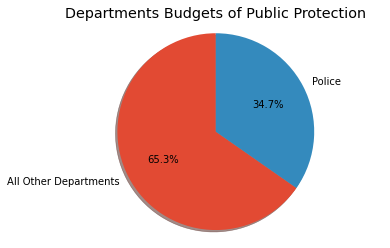

In [13]:
slices = [others_sum, police_sum]
labels = ['All Other Departments', 'Police']
fig, ax1 = plt.subplots()

ax1.pie(slices, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Departments Budgets of Public Protection')
# plt.pie(means, labels=labels)
plt.show()

Focusing more on the Police Department

In [14]:
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [15]:
df_police = df[df['Department'] == 'POL Police']
df_police.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
93,1999,Spending,No,Public Protection,POL Police,Senior Escort Service,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,10958.13
94,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Other Materials & Supplies,Forms,General Fund,Operating,43255.58
106,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Small Tools And Intruments,General Fund,Operating,991.21
140,1999,Revenue,No,Public Protection,POL Police,Police Services,Intergovernmental Rev-Other,Other - Governmental Agencies,Other Local-Regional Grants,Public Protection Fund,Continuing Projects,3000.00
186,1999,Spending,No,Public Protection,POL Police,911/Communications,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Operating,293054.99


In [16]:
df_police['Program'].value_counts()

Operations And Administration               3098
Investigations                              2547
Patrol                                      2483
Office Of Citizen Complaints                 952
Work Order Services                          790
Airport Police                               469
Crime Control                                279
SFPD Training                                267
Police Operations                            253
Special Operations                           210
SFPD-Recruitment And Examination Program     191
Senior Escort Service                        186
No Program Defined                           123
Fingerprint                                  123
Narcotics Forfeiture                          92
911/Communications                            92
Vehicle Theft Abatement                       72
Taxi Enforcement                              65
SFPD-Crime Photo Labs-Cri                     56
Police Services                               55
Capital Programs & C

In [17]:
df_police['Character'].value_counts()

Non Personnel Services            3069
Mandatory Fringe Benefits         2751
Salaries                          2010
Materials & Supplies              1750
Services Of Other Depts            944
Capital Outlay                     421
Charges For Services               416
Expenditure Recovery               349
Intergovernmental Rev-State        159
Intergovernmental Rev-Federal      143
Transfer Adjustments-Sources        92
Transfer Adjustments-Uses           92
Other Revenues                      71
Fines; Forfeitures & Penalties      64
Interest & Investment Income        60
Licenses; Permits & Franchises      32
Operating Transfers Out             27
Operating Transfers In              15
Overhead and Allocations            15
Intergovernmental Rev-Other          8
Other Support&Care Of Persons        7
City Grant Programs                  7
Intrafund Transfers Out              3
Intrafund Transfers In               2
Name: Character, dtype: int64

In [25]:
df_police[df_police['Fiscal Year']==2017]

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
488454,2017,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Misc-Vacation,Gift Fund,Grants,702.96
488457,2017,Spending,No,Public Protection,POL Police,Patrol,Salaries,One-Time Payments,Ret Payout - SP & Vac - Misc,General Fund,Operating,1041638.35
488622,2017,Spending,No,Public Protection,POL Police,Airport Police,Salaries,One-Time Payments,Ret Payout - SP & Vac - Misc,Airport Operating Fund,Operating,267617.17
488675,2017,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Training,Training Costs Paid To Vendors,Public Protection Fund,Continuing Projects,-19609.37
488808,2017,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Electrical,General Fund,Operating,6497.76
...,...,...,...,...,...,...,...,...,...,...,...,...
518854,2017,Spending,No,Public Protection,POL Police,Operations And Administration,Non Personnel Services,Profess & Specialized Svcs,Other Medical Services,General Fund,Operating,174743.79
518968,2017,Spending,No,Public Protection,POL Police,Investigations,Non Personnel Services,Training,Training Costs Paid To Emplye,Public Protection Fund,Continuing Projects,36358.45
518972,2017,Spending,No,Public Protection,POL Police,Investigations,Mandatory Fringe Benefits,Other Fringe Benefits,Long Term Disability Insurance,Public Protection Fund,Continuing Projects,767.82
519034,2017,Spending,No,Public Protection,POL Police,Operations And Administration,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Continuing Projects,980.00


In [19]:
df_pol_programs = df_police.groupby(['Program'])[['Amount']].agg('sum')
df_pol_programs

,Amount
Program,
911/Communications,1.664207e+07
Airport Police,6.566977e+08
Capital Programs & Construction,2.440704e+06
Capital Projects,-2.579930e+05
City Capital Projects,6.630000e+02
Crime Control,3.557957e+08
Departmental Fund Transfer,1.152487e+06
Federal Transportation Security,1.101668e+07
Fingerprint,1.365089e+07


In [20]:
years = df['Fiscal Year'].unique()
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [21]:
df_year = []
for year in years:
    df_year.append( df_police[df_police['Fiscal Year'] == year])

In [22]:
df_year[0]

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
93,1999,Spending,No,Public Protection,POL Police,Senior Escort Service,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,10958.13
94,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Other Materials & Supplies,Forms,General Fund,Operating,43255.58
106,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Small Tools And Intruments,General Fund,Operating,991.21
140,1999,Revenue,No,Public Protection,POL Police,Police Services,Intergovernmental Rev-Other,Other - Governmental Agencies,Other Local-Regional Grants,Public Protection Fund,Continuing Projects,3000.00
186,1999,Spending,No,Public Protection,POL Police,911/Communications,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Operating,293054.99
...,...,...,...,...,...,...,...,...,...,...,...,...
23416,1999,Revenue,No,Public Protection,POL Police,SFPD Training,Intergovernmental Rev-State,State - Other,Peace Officer Training,Public Protection Fund,Continuing Projects,636532.68
23430,1999,Spending,No,Public Protection,POL Police,Investigations,Salaries,Permanent Salaries-Misc,Perm Salaries-Misc-Regular,General Fund,Operating,20665671.86
23449,1999,Spending,No,Public Protection,POL Police,Office Of Citizen Complaints,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,1005.11
23514,1999,Spending,No,Public Protection,POL Police,911/Communications,Mandatory Fringe Benefits,Social Security,Social Security (Oasdi & Hi),General Fund,Operating,450453.33


In [26]:
program_sums = []
for i in range(19):
    program_sums.append( pd.DataFrame(df_year[i].groupby('Program').Amount.agg('sum')) )
    col_year = years[i]
    program_sums[i].columns = [col_year]

In [27]:
df_aggregated = pd.concat(program_sums, axis=1)
df_aggregated

/home/dcarmody/Envs/ds-project3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
911/Communications,1.616017e+07,3.923009e+05,NaN,NaN,NaN,7.373300e+03,NaN,NaN,1.014080e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.497209e+04,5.614840e+03,2.062876e+04
Airport Police,1.806696e+07,2.112372e+07,2.509837e+07,2.691203e+07,2.514443e+07,2.675225e+07,2.783608e+07,2.957274e+07,3.138768e+07,3.151500e+07,3.621037e+07,3.654462e+07,4.041619e+07,4.378459e+07,4.406968e+07,4.500167e+07,4.644925e+07,4.892530e+07,5.188674e+07
Capital Programs & Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.426190e+05,1.302575e+06,NaN,1.547123e+05,1.441829e+05,1.508661e+05,1.480664e+05,1.976820e+05
Capital Projects,NaN,-3.550000e+05,NaN,NaN,NaN,9.700700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Capital Projects,6.630000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime Control,8.087882e+06,1.328624e+07,1.436363e+07,1.333525e+07,1.359413e+07,1.156405e+07,1.397536e+07,1.913258e+07,1.989076e+07,2.538111e+07,2.027493e+07,2.184011e+07,2.079198e+07,2.249845e+07,2.113642e+07,2.104378e+07,2.157981e+07,2.693070e+07,2.708857e+07
Departmental Fund Transfer,NaN,NaN,NaN,NaN,NaN,4.717784e+05,-3.350000e+02,1.152822e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.717784e+05,NaN
Federal Transportation Security,NaN,NaN,NaN,NaN,1.114382e+07,-1.271356e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fingerprint,1.759181e+06,1.184828e+06,5.632793e+06,2.439028e+06,1.491430e+06,1.143626e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investigations,3.608852e+07,3.982889e+07,4.049413e+07,4.397617e+07,5.116861e+07,5.035600e+07,5.951581e+07,6.272322e+07,6.675158e+07,7.235046e+07,7.275879e+07,6.679826e+07,6.444721e+07,6.959713e+07,7.715829e+07,7.954922e+07,7.907833e+07,8.270760e+07,8.665262e+07


In [28]:
df_aggregated = df_aggregated.fillna(0)

In [29]:
df_aggregated

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
911/Communications,1.616017e+07,3.923009e+05,0.000000e+00,0.000000e+00,0.000000e+00,7.373300e+03,0.000000e+00,0.000000e+00,1.014080e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.497209e+04,5.614840e+03,2.062876e+04
Airport Police,1.806696e+07,2.112372e+07,2.509837e+07,2.691203e+07,2.514443e+07,2.675225e+07,2.783608e+07,2.957274e+07,3.138768e+07,3.151500e+07,3.621037e+07,3.654462e+07,4.041619e+07,4.378459e+07,4.406968e+07,4.500167e+07,4.644925e+07,4.892530e+07,5.188674e+07
Capital Programs & Construction,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.426190e+05,1.302575e+06,0.000000e+00,1.547123e+05,1.441829e+05,1.508661e+05,1.480664e+05,1.976820e+05
Capital Projects,0.000000e+00,-3.550000e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.700700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
City Capital Projects,6.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Crime Control,8.087882e+06,1.328624e+07,1.436363e+07,1.333525e+07,1.359413e+07,1.156405e+07,1.397536e+07,1.913258e+07,1.989076e+07,2.538111e+07,2.027493e+07,2.184011e+07,2.079198e+07,2.249845e+07,2.113642e+07,2.104378e+07,2.157981e+07,2.693070e+07,2.708857e+07
Departmental Fund Transfer,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.717784e+05,-3.350000e+02,1.152822e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.717784e+05,0.000000e+00
Federal Transportation Security,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.114382e+07,-1.271356e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fingerprint,1.759181e+06,1.184828e+06,5.632793e+06,2.439028e+06,1.491430e+06,1.143626e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Investigations,3.608852e+07,3.982889e+07,4.049413e+07,4.397617e+07,5.116861e+07,5.035600e+07,5.951581e+07,6.272322e+07,6.675158e+07,7.235046e+07,7.275879e+07,6.679826e+07,6.444721e+07,6.959713e+07,7.715829e+07,7.954922e+07,7.907833e+07,8.270760e+07,8.665262e+07


In [30]:
df_transposed = df_aggregated.T

In [31]:
programs = df_transposed.columns

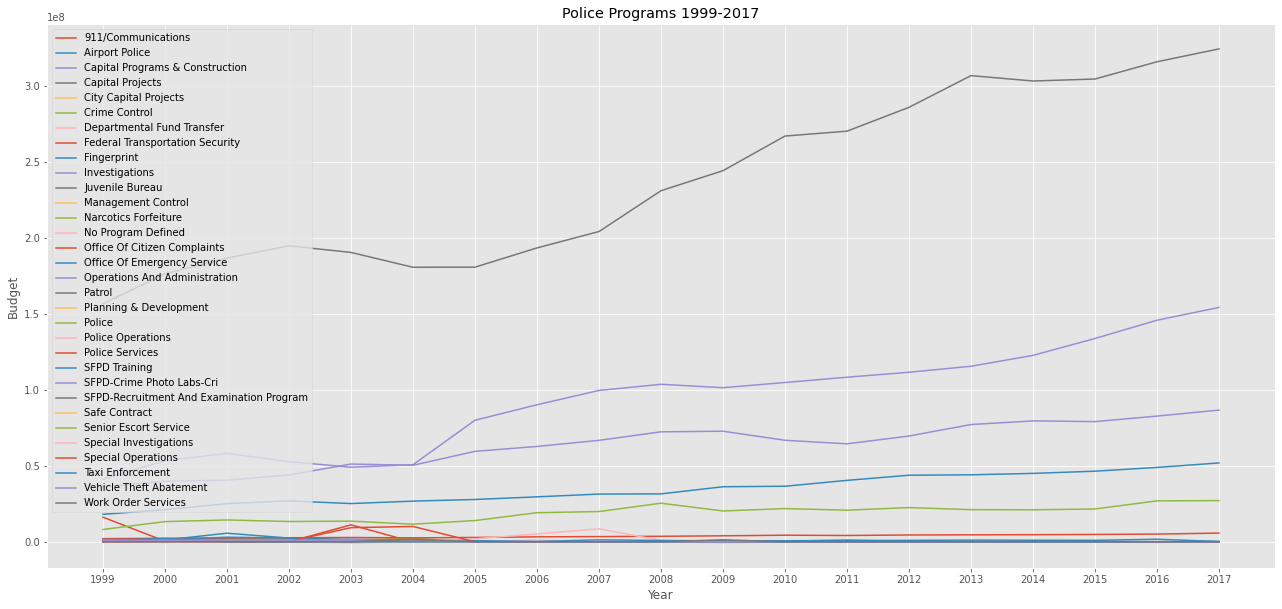

In [32]:

plt.figure(figsize=(22,10))

plt.title('Police Programs 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')


plt.xticks(np.arange(min(np.array(df_transposed.index)), max(np.array(df_transposed.index))+1, 1.0))

for program in programs:
    plt.plot(df_transposed.index, np.array(df_transposed[program]),
         label=program)


plt.legend()
plt.show()

In [33]:
sum_program = np.array([])
for program in programs:
    sum_val = df_transposed[program].sum()
    sum_program = np.append(sum_program, sum_val)
sum_program

array([ 1.66420724e+07,  6.56697679e+08,  2.44070371e+06, -2.57993000e+05,
        6.63000000e+02,  3.55795747e+08,  1.15248748e+06,  1.10166819e+07,
        1.36508861e+07,  1.20200084e+09,  1.41251970e+05,  2.03740000e+02,
        9.38325380e+06, -1.13636873e+06,  6.96571229e+07,  6.50687420e+05,
        1.77645831e+09,  4.51676769e+09,  1.41861462e+06,  1.47217000e+04,
        1.86475509e+07,  7.04156340e+05,  2.14148426e+07,  3.21960399e+06,
        8.29307808e+06,  3.65608466e+06,  5.58211579e+06,  3.52823000e+04,
        2.02804998e+07,  2.79372002e+06,  5.99774239e+06,  2.78869725e+06])

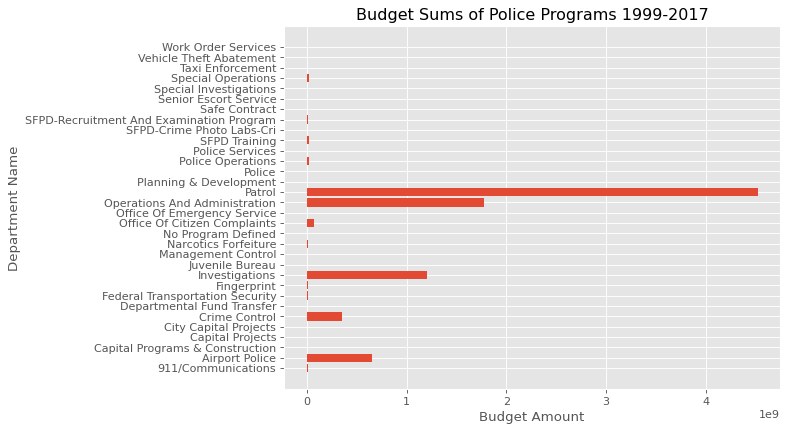

In [34]:
y_pos = np.arange(len(sum_program))
program_names = np.array(df_transposed.columns)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Budget Sums of Police Programs 1999-2017')
plt.barh(y_pos, sum_program)
plt.yticks(y_pos, program_names)
plt.xlabel('Budget Amount')
plt.ylabel('Department Name')
plt.show()

In [35]:
# removing the 5 largest programs from the graph to look at the other programs with less funding
largest_programs = np.array(['Patrol', 'Operations And Administration', 
                             'Investigations', 'Crime Control', 'Airport Police'])
indices = np.array([], int)
for l_program in largest_programs:
    index = int(np.where(program_names == l_program)[0])
    indices = np.append(indices, index)
indices

array([17, 16,  9,  5,  1])

In [36]:
for index in indices:
    name = program_names[index]
    amount = sum_program[index]
    print('Program Name: {}, Program Amount: {}, Index: {}'.format(name, amount, index))

Program Name: Patrol, Program Amount: 4516767685.160001, Index: 17
Program Name: Operations And Administration, Program Amount: 1776458312.83, Index: 16
Program Name: Investigations, Program Amount: 1202000842.04, Index: 9
Program Name: Crime Control, Program Amount: 355795747.23999995, Index: 5
Program Name: Airport Police, Program Amount: 656697679.1599998, Index: 1


In [37]:
smaller_programs = np.copy(program_names)
smaller_budgets = np.copy(sum_program)

In [38]:
smaller_programs = np.delete(smaller_programs, indices)
smaller_budgets = np.delete(smaller_budgets, indices)

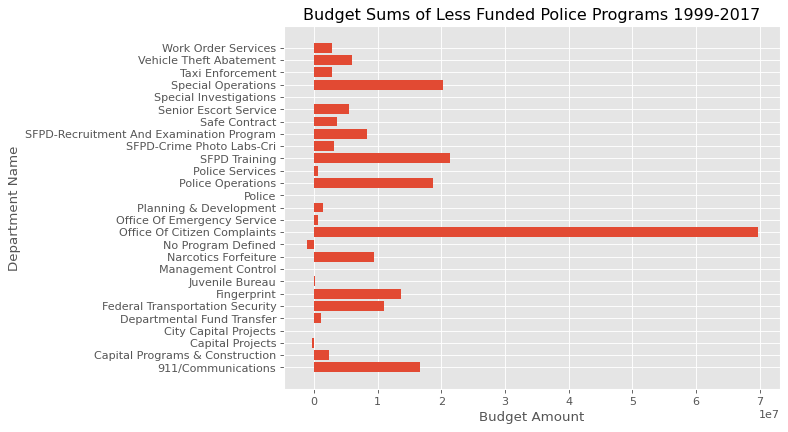

In [39]:
y_pos = np.arange(len(smaller_budgets))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Budget Sums of Less Funded Police Programs 1999-2017')
plt.barh(y_pos, smaller_budgets)
plt.yticks(y_pos, smaller_programs)
plt.xlabel('Budget Amount')
plt.ylabel('Department Name')
plt.show()

In [40]:
programs_of_interest = np.array(['Office Of Citizen Complaints', 'SFPD Training', 
                                 'Special Operations', 'Police Operations', '911/Communications',
                                 'SFPD-Recruitment And Examination Program'])
indices = np.array([], int)
for i_program in programs_of_interest:
    index = np.where(program_names == i_program)
    print(program_names[index])
    print(sum_program[index])
    indices = np.append(indices, index)
indices

['Office Of Citizen Complaints']
[69657122.94999999]
['SFPD Training']
[21414842.57]
['Special Operations']
[20280499.75]
['Police Operations']
[18647550.86]
['911/Communications']
[16642072.39]
['SFPD-Recruitment And Examination Program']
[8293078.08]


array([14, 22, 28, 20,  0, 24])

In [41]:
for index in indices:
    name = program_names[index]
    amount = sum_program[index]
    print('Program Name: {}, Program Amount: {}, Index: {}'.format(name, amount, index))

Program Name: Office Of Citizen Complaints, Program Amount: 69657122.94999999, Index: 14
Program Name: SFPD Training, Program Amount: 21414842.570000004, Index: 22
Program Name: Special Operations, Program Amount: 20280499.75, Index: 28
Program Name: Police Operations, Program Amount: 18647550.86, Index: 20
Program Name: 911/Communications, Program Amount: 16642072.39, Index: 0
Program Name: SFPD-Recruitment And Examination Program, Program Amount: 8293078.080000001, Index: 24


In [42]:
# creating new datasets specialized on the programs we want to focus on
df_pol_patrol = df_police[df_police['Program'] == 'Patrol']
df_pol_spec_ops = df_police[df_police['Program'] == 'Special Operations']
df_pol_admin = df_police[df_police['Program'] == 'Operations And Administration']
df_pol_recruit = df_police[df_police['Program'] == 'SFPD-Recruitment And Examination Program']
df_pol_train = df_police[df_police['Program'] == 'SFPD Training']

Taking a deeper dive into the Patrol Program, since this is the most funded program of the Police

In [43]:
df_pol_patrol.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
512,1999,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),Public Protection Fund,Grants,1422.94
575,1999,Spending,No,Public Protection,POL Police,Patrol,Non Personnel Services,Profess & Specialized Svcs,Other Professional Services,General Fund,Operating,520.80
820,1999,Spending,No,Public Protection,POL Police,Patrol,Non Personnel Services,Training,Training Costs Paid To Emplye,Public Protection Fund,Continuing Projects,783.00
893,1999,Spending,No,Public Protection,POL Police,Patrol,Mandatory Fringe Benefits,Social Security,Social Security (Oasdi & Hi),Public Protection Fund,Continuing Projects,584.48
3529,1999,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Misc-Disability Pay,General Fund,Operating,2885683.63


In [44]:
df_pol_patrol['Character'].value_counts()

Mandatory Fringe Benefits         579
Non Personnel Services            500
Salaries                          442
Materials & Supplies              373
Services Of Other Depts           267
Capital Outlay                     81
Intergovernmental Rev-Federal      43
Charges For Services               35
Intergovernmental Rev-State        30
Transfer Adjustments-Uses          25
Transfer Adjustments-Sources       25
Other Revenues                     19
Expenditure Recovery               18
Operating Transfers Out            12
Interest & Investment Income       10
Operating Transfers In              9
Overhead and Allocations            6
City Grant Programs                 4
Intrafund Transfers In              2
Licenses; Permits & Franchises      1
Intergovernmental Rev-Other         1
Intrafund Transfers Out             1
Name: Character, dtype: int64

In [45]:
df_patrol_sums = df_pol_patrol.groupby(['Character'])[['Amount']].agg('sum')
df_patrol_sums

,Amount
Character,
Capital Outlay,1.280888e+07
Charges For Services,1.872790e+07
City Grant Programs,1.461323e+05
Expenditure Recovery,1.441527e+07
Interest & Investment Income,1.597164e+05
Intergovernmental Rev-Federal,5.400883e+07
Intergovernmental Rev-Other,4.432516e+04
Intergovernmental Rev-State,2.038458e+08
Intrafund Transfers In,7.909720e+05


In [46]:
df_patrol_ch = np.array(df_patrol_sums.index)

In [47]:
df_patrol_vals = np.array(df_patrol_sums['Amount'])

In [48]:
df_patrol_sums[df_patrol_sums.index == 'Mandatory Fringe Benefits']

,Amount
Character,
Mandatory Fringe Benefits,6.674038e+08


In [49]:
df_pol_patrol[df_pol_patrol['Character'] == 'Salaries']['Object'].value_counts()

Permanent Salaries-Misc    239
Overtime                    67
One-Time Payments           48
Premium Pay                 47
Holiday Pay                 41
Name: Object, dtype: int64

In [50]:
df_pol_patrol[df_pol_patrol['Character'] == 'Salaries'][['Object', 'Amount']].groupby('Object').agg('sum')

,Amount
Object,
Holiday Pay,8.025669e+07
One-Time Payments,5.269974e+07
Overtime,2.187603e+08
Permanent Salaries-Misc,2.705054e+09
Premium Pay,1.510441e+08


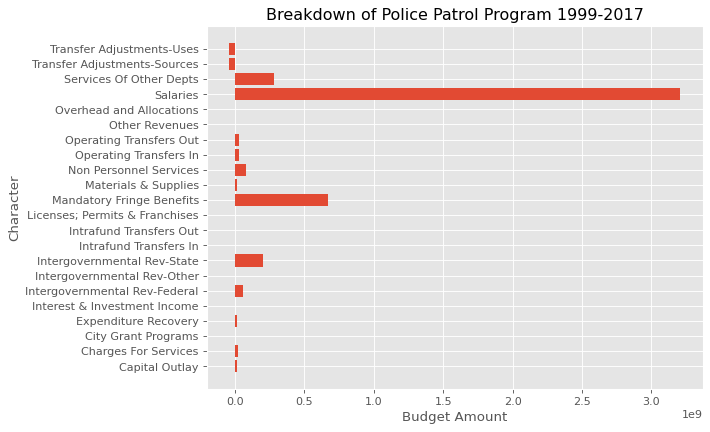

In [51]:
y_pos = np.arange(len(df_patrol_ch))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Patrol Program 1999-2017')
plt.barh(y_pos, df_patrol_vals)
plt.yticks(y_pos, df_patrol_ch)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [52]:
# df_pol_spec_ops_ch

In [53]:
df_pol_spec_ops[df_pol_spec_ops['Character'] == 'Charges For Services']

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
135081,2004,Revenue,No,Public Protection,POL Police,Special Operations,Charges For Services,Public Safety Service Charges,Other Public Safety Charges,General Fund,Operating,11999.17


In [54]:
df_pol_spec_ops_ch = df_pol_spec_ops.groupby(['Character'])[['Amount']].agg('sum')
df_pol_spec_ops_ch['Amount'].values

array([1.82788260e+05, 1.19991700e+04, 1.78655264e+06, 4.54847070e+05,
       8.95092030e+05, 2.00000000e+02, 1.69187206e+07, 3.03000000e+04])

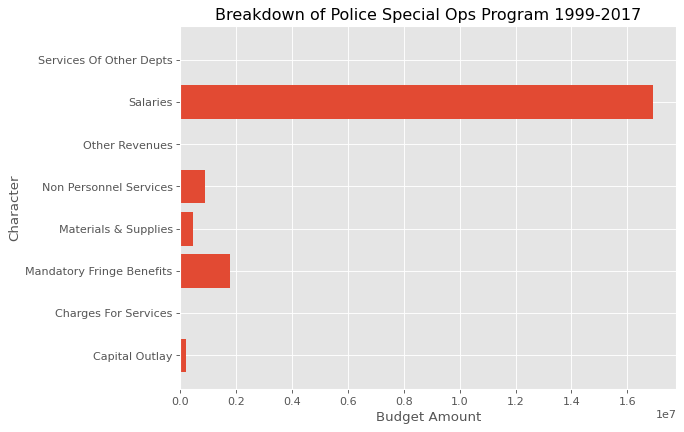

In [55]:
y_pos = np.arange(len(df_pol_spec_ops_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Special Ops Program 1999-2017')
plt.barh(y_pos, df_pol_spec_ops_ch['Amount'].values)
plt.yticks(y_pos, df_pol_spec_ops_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [56]:
df_pol_admin_ch = df_pol_admin.groupby(['Character'])[['Amount']].agg('sum')
df_pol_admin_ch

,Amount
Character,
Capital Outlay,4.768583e+07
Charges For Services,6.991802e+07
City Grant Programs,5.731230e+05
Expenditure Recovery,2.565250e+06
Fines; Forfeitures & Penalties,9.298113e+06
Interest & Investment Income,5.971220e+03
Intergovernmental Rev-Federal,7.029566e+06
Intergovernmental Rev-Other,4.700000e+04
Intergovernmental Rev-State,5.066407e+08


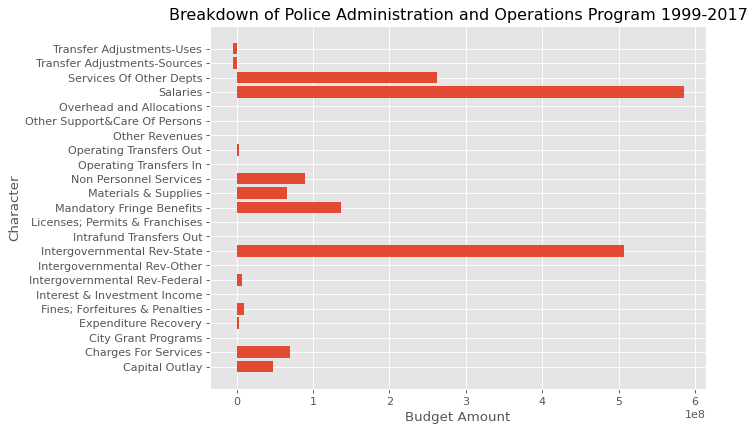

In [57]:
y_pos = np.arange(len(df_pol_admin_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Administration and Operations Program 1999-2017')
plt.barh(y_pos, df_pol_admin_ch['Amount'].values)
plt.yticks(y_pos, df_pol_admin_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [58]:
df_pol_recruit_ch = df_pol_recruit.groupby(['Character'])[['Amount']].agg('sum')
df_pol_recruit_ch

,Amount
Character,
Capital Outlay,18452.60
Expenditure Recovery,-21717.16
Mandatory Fringe Benefits,888665.43
Materials & Supplies,305677.10
Non Personnel Services,2487472.08
Overhead and Allocations,-6.53
Salaries,4199327.92
Services Of Other Depts,371772.32
Transfer Adjustments-Sources,21717.16


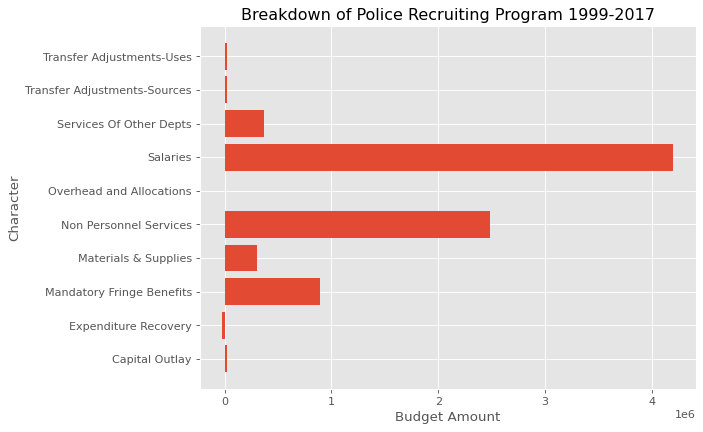

In [59]:
y_pos = np.arange(len(df_pol_recruit_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Recruiting Program 1999-2017')
plt.barh(y_pos, df_pol_recruit_ch['Amount'].values)
plt.yticks(y_pos, df_pol_recruit_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

In [60]:
df_pol_train_ch = df_pol_train.groupby(['Character'])[['Amount']].agg('sum')
df_pol_train_ch

,Amount
Character,
Capital Outlay,954702.69
Charges For Services,148743.94
Intergovernmental Rev-State,10877961.00
Mandatory Fringe Benefits,32406.95
Materials & Supplies,807337.21
Non Personnel Services,3901039.43
Salaries,4211198.90
Services Of Other Depts,481452.45


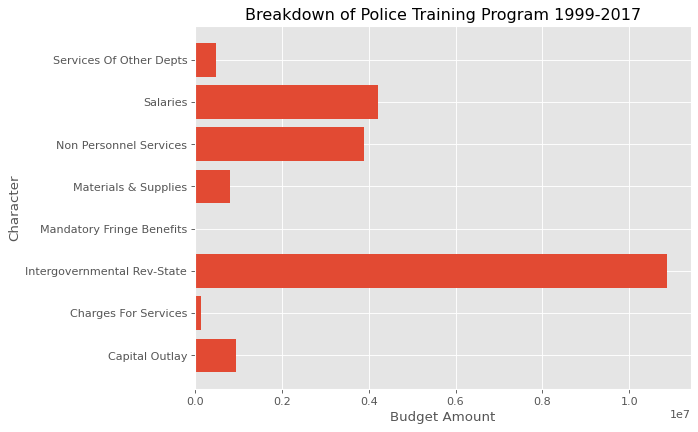

In [61]:
y_pos = np.arange(len(df_pol_train_ch.index))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Breakdown of Police Training Program 1999-2017')
plt.barh(y_pos, df_pol_train_ch['Amount'].values)
plt.yticks(y_pos, df_pol_train_ch.index)
plt.xlabel('Budget Amount')
plt.ylabel('Character')
plt.show()

Looking at trends of the budget data over time

In [62]:
df_police.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
93,1999,Spending,No,Public Protection,POL Police,Senior Escort Service,Mandatory Fringe Benefits,Social Security,Social Sec-Medicare(HI Only),General Fund,Operating,10958.13
94,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Other Materials & Supplies,Forms,General Fund,Operating,43255.58
106,1999,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Small Tools And Intruments,General Fund,Operating,991.21
140,1999,Revenue,No,Public Protection,POL Police,Police Services,Intergovernmental Rev-Other,Other - Governmental Agencies,Other Local-Regional Grants,Public Protection Fund,Continuing Projects,3000.00
186,1999,Spending,No,Public Protection,POL Police,911/Communications,Salaries,Premium Pay,Premium Pay - Misc,General Fund,Operating,293054.99


In [63]:
df_year = []
for index, year in enumerate(df_police['Fiscal Year'].unique()):
    df_year.append( df[df['Fiscal Year'] == year])

In [64]:
df_year[0].head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [65]:
program_sums = []
for i in range(19):
    program_sums.append( pd.DataFrame(df_year[i].groupby('Program').Amount.agg('sum')) )
    col_year = years[i]
    program_sums[i].columns = [col_year]

Looking at certain prorgams and as they change over time, these programs are 
-Patrol
-Special Operations
-Administration and Operations
-Police Recruiting
-Police Training

In [66]:
df_agg_programs=pd.concat(program_sums, axis=1)
df_agg_programs.fillna(0, inplace=True)
df_agg_programs.head()

/home/dcarmody/Envs/ds-project3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1660 Mission Street Building,2375527.99,2303120.36,2656967.90,3050825.42,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25 Van Ness Building,4750712.86,5408838.48,6159096.35,5070357.14,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
30 Van Ness Building,0.00,0.00,0.00,75113448.23,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
311 Call Center,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5226796.34,7938438.63,3980095.29,4327345.5,3323478.14,3612069.11,4127040.11,4132987.24,4418793.59,4640245.59,6249178.77
3Com Park,19646512.14,17023628.77,10107891.64,8941622.16,12178551.64,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [67]:
important_programs = ['Patrol', 'Operations And Administration', 'Special Operations',
                      'SFPD-Recruitment And Examination Program', 'SFPD Training']

In [68]:
df_agg_programs = df_agg_programs.loc[important_programs]

In [69]:
df_tran_programs = df_agg_programs.T

In [70]:
df_tran_programs

,Patrol,Operations And Administration,Special Operations,SFPD-Recruitment And Examination Program,SFPD Training
1999,1.566657e+08,4.110268e+07,151017.92,1292994.89,1490869.85
2000,1.763137e+08,5.329274e+07,305729.53,1544261.40,1380405.97
2001,1.867238e+08,5.817293e+07,163570.07,1735868.52,3000961.24
2002,1.947401e+08,5.272834e+07,291461.02,1344727.58,2465499.89
2003,1.904606e+08,4.906499e+07,9285482.67,1383969.78,1099537.23
2004,1.806452e+08,5.071372e+07,10083238.54,991255.91,1048983.57
2005,1.807123e+08,7.997473e+07,0.00,0.00,731208.16
2006,1.933768e+08,9.016354e+07,0.00,0.00,223558.12
2007,2.041555e+08,9.958305e+07,0.00,0.00,1261131.59
2008,2.310162e+08,1.036423e+08,0.00,0.00,855390.40


In [71]:
labels = list(df_tran_programs.columns)

In [72]:
labels

['Patrol',
 'Operations And Administration',
 'Special Operations',
 'SFPD-Recruitment And Examination Program',
 'SFPD Training']

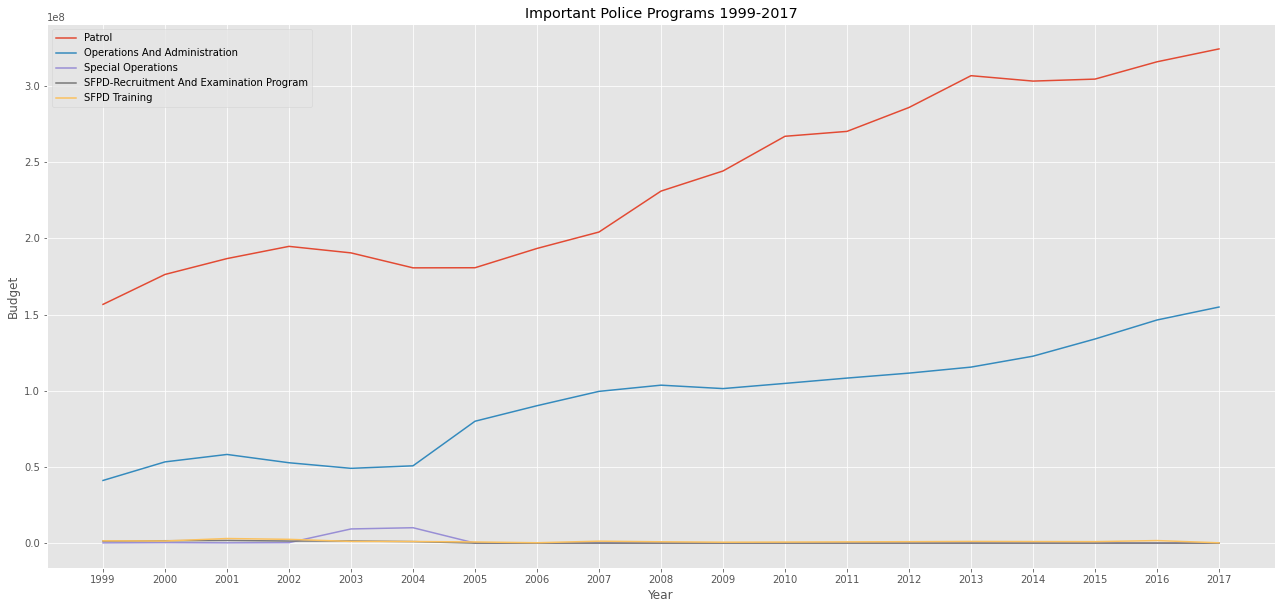

In [73]:

plt.figure(figsize=(22,10))

plt.title('Important Police Programs 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')


plt.xticks(np.arange(min(np.array(df_tran_programs.index)), max(np.array(df_tran_programs.index))+1, 
                     1.0))

for program in labels:
    plt.plot(df_tran_programs.index, np.array(df_tran_programs[program]),
         label=program)


plt.legend()
plt.show()

In [74]:
labels2 = labels[2:]
labels2

['Special Operations',
 'SFPD-Recruitment And Examination Program',
 'SFPD Training']

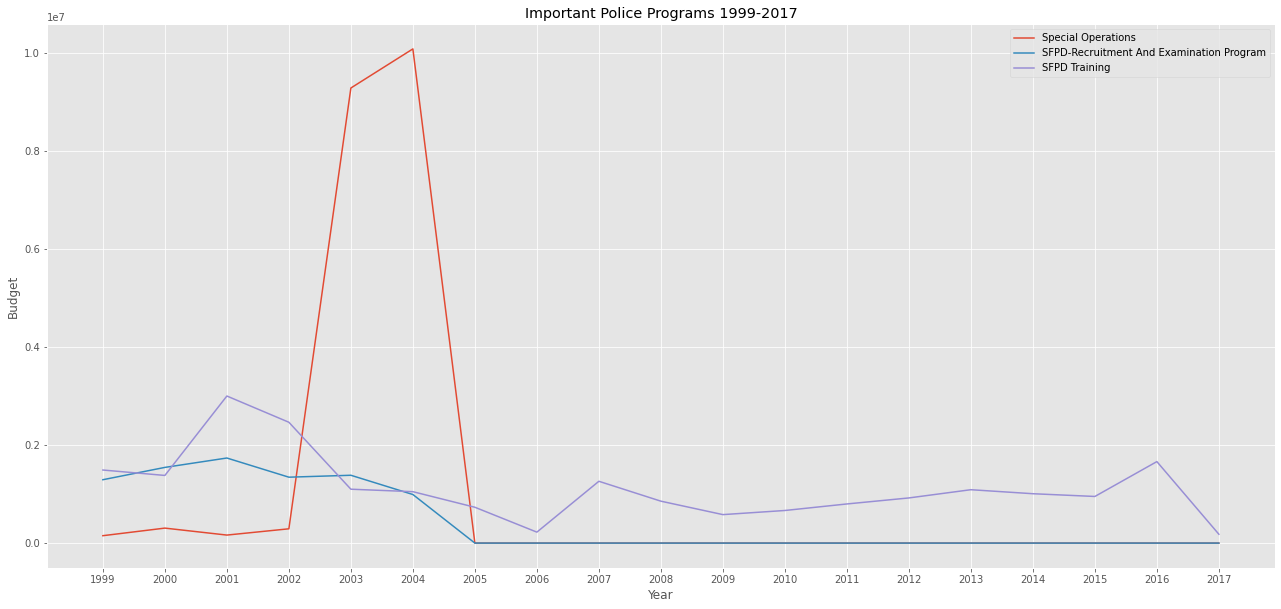

In [75]:

plt.figure(figsize=(22,10))

plt.title('Important Police Programs 1999-2017')
plt.xlabel('Year')
plt.ylabel('Budget')


plt.xticks(np.arange(min(np.array(df_tran_programs.index)), max(np.array(df_tran_programs.index))+1, 
                     1.0))

for program in labels2:
    plt.plot(df_tran_programs.index, np.array(df_tran_programs[program]),
         label=program)


plt.legend()
plt.show()

In [76]:
df_tran_programs

,Patrol,Operations And Administration,Special Operations,SFPD-Recruitment And Examination Program,SFPD Training
1999,1.566657e+08,4.110268e+07,151017.92,1292994.89,1490869.85
2000,1.763137e+08,5.329274e+07,305729.53,1544261.40,1380405.97
2001,1.867238e+08,5.817293e+07,163570.07,1735868.52,3000961.24
2002,1.947401e+08,5.272834e+07,291461.02,1344727.58,2465499.89
2003,1.904606e+08,4.906499e+07,9285482.67,1383969.78,1099537.23
2004,1.806452e+08,5.071372e+07,10083238.54,991255.91,1048983.57
2005,1.807123e+08,7.997473e+07,0.00,0.00,731208.16
2006,1.933768e+08,9.016354e+07,0.00,0.00,223558.12
2007,2.041555e+08,9.958305e+07,0.00,0.00,1261131.59
2008,2.310162e+08,1.036423e+08,0.00,0.00,855390.40


# DRC analysis and data sets

In [77]:
df.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
0,1999,Revenue,No,Public Protection,CRT Superior Court,Trial Court Services,Charges For Services,General Government Services,Court Fees,General Fund,Operating,525632.62
1,1999,Spending,No,Public Protection,PDR Public Defender,Criminal And Special Defense,Non Personnel Services,Training,Training Costs Paid To Emplye,General Fund,Operating,425.83
2,1999,Spending,No,"Public Works, Transportation & Commerce",WTR Water Enterprise,Water Facilities Maintenance Projects,Salaries,Permanent Salaries-Misc,Misc-Other Timeoff,Water Operating Fund,Continuing Projects,17433.51
3,1999,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Ag Wts & Measures Inspection,Non Personnel Services,Employee Expenses,Local Field Exp,General Fund,Work Orders/Overhead,24.00
4,1999,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,Engineering,Mandatory Fringe Benefits,Unemployment Insurance,Unemployment Insurance,General Fund,Continuing Projects,380.15


In [79]:
recent = df[df['Fiscal Year'] == 2017]
recent.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
488450,2017,Spending,No,"Public Works, Transportation & Commerce",MTA Municipal Transprtn Agncy,Capital Programs & Construction,Mandatory Fringe Benefits,Other Fringe Benefits,Other Fringe Benefits,Parking & Traffic Capital Projects Fund,Continuing Projects,36785.25
488451,2017,Spending,No,"Public Works, Transportation & Commerce",HHP Hetch Hetchy Water & Power,Administration,Mandatory Fringe Benefits,Dental Coverage,Dental Coverage,Water Operating Fund,Work Orders/Overhead,42.29
488452,2017,Spending,No,"Public Works, Transportation & Commerce",DPW GSA - Public Works,DPW Labor Cost Distribution,Overhead and Allocations,Overhead,Division Overhead,"Public Works, Transp. & Commerce Fund",Work Orders/Overhead,1310.18
488453,2017,Spending,No,General Administration & Finance,ADM Gen Svcs Agency-City Admin,Medical Examiner,Mandatory Fringe Benefits,Retirement,Retire City Misc,General Fund,Operating,716703.15
488454,2017,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Misc-Vacation,Gift Fund,Grants,702.96


In [83]:
recent_spending = recent[recent['Revenue or Spending'] == 'Spending']
recent_pol_spending = recent_spending[recent_spending.Department == 'POL Police']
recent_pol_spending.head()

,Fiscal Year,Revenue or Spending,Related Govt Units,Organization Group,Department,Program,Character,Object,Sub-object,Fund,Fund Category,Amount
488454,2017,Spending,No,Public Protection,POL Police,Patrol,Salaries,Permanent Salaries-Misc,Misc-Vacation,Gift Fund,Grants,702.96
488457,2017,Spending,No,Public Protection,POL Police,Patrol,Salaries,One-Time Payments,Ret Payout - SP & Vac - Misc,General Fund,Operating,1041638.35
488622,2017,Spending,No,Public Protection,POL Police,Airport Police,Salaries,One-Time Payments,Ret Payout - SP & Vac - Misc,Airport Operating Fund,Operating,267617.17
488675,2017,Spending,No,Public Protection,POL Police,SFPD Training,Non Personnel Services,Training,Training Costs Paid To Vendors,Public Protection Fund,Continuing Projects,-19609.37
488808,2017,Spending,No,Public Protection,POL Police,Operations And Administration,Materials & Supplies,Building & Constructn Supplies,Electrical,General Fund,Operating,6497.76


In [136]:
tree_map_list = []

In [137]:
d = {}
d['Department'] = 'Total Budget'
d['2017'] = recent_spending.Amount.sum()
d['Parent'] = ''
tree_map_list.append(d)

In [138]:
for i, r in recent_spending.groupby(by='Organization Group').Amount.sum().reset_index().iterrows(): 
    d = {}
    d['Department'] = r['Organization Group']
    d['2017'] = r['Amount']
    d['Parent'] = 'Total Budget'
    tree_map_list.append(d)

In [139]:
for i, r in recent_pp_spending.groupby(by='Department').Amount.sum().reset_index().iterrows():
    d = {}
    d['Department'] = r['Department']
    d['2017'] = r['Amount']
    d['Parent'] = 'Public Protection'
    tree_map_list.append(d)

In [141]:
recent_pol_spending.groupby(by='Program').Amount.sum()

for i, r in recent_pol_spending.groupby(by='Program').Amount.sum().reset_index().iterrows():
    d = {}
    d['Department'] = r['Program']
    d['2017'] = r['Amount']
    d['Parent'] = 'POL Police'
    tree_map_list.append(d)

In [169]:
for i, r in recent_pol_spending.groupby(by=['Program','Character']).Amount.sum().reset_index().iterrows():
    d = {}
    d['Department'] = r['Character']
    d['2017'] = r['Amount']
    d['Parent'] = r['Program']
    tree_map_list.append(d)

In [176]:
f = open('tree_map.json','w')
f.write(str(tree_map_list))
f.close()

## spending

In [143]:
spending = df[df['Revenue or Spending'] == 'Spending']

In [145]:
pol_spending = spending[spending['Department'] == 'POL Police']

In [157]:
pol_spending.groupby(by='Fiscal Year').Amount.sum() \
.reset_index().to_csv('total_police_spending.csv',index=None)

In [ ]:
pol_spending[pol_spending.Program=='Patrol'].groupby(by='Fiscal Year').Amount.sum()

In [149]:
pol_spending[pol_spending.Program=='Patrol'].groupby(by='Fiscal Year').Amount.sum()

Fiscal Year
1999    1.270099e+08
2000    1.376529e+08
2001    1.466008e+08
2002    1.556100e+08
2003    1.557738e+08
2004    1.458501e+08
2005    1.727468e+08
2006    1.864896e+08
2007    1.985508e+08
2008    2.289733e+08
2009    2.418901e+08
2010    2.608589e+08
2011    2.641171e+08
2012    2.765462e+08
2013    2.987964e+08
2014    3.011641e+08
2015    3.027112e+08
2016    3.142556e+08
2017    3.230116e+08
Name: Amount, dtype: float64

In [155]:
pol_spending[pol_spending.Program=='SFPD Training'].groupby(by='Fiscal Year').Amount.sum() \
.reset_index().to_csv('police_training_spending.csv',index=None)

In [163]:
pol_spending[pol_spending.Character == 'Salaries'].groupby(by='Fiscal Year').Amount.sum() \
.reset_index().to_csv('police_salaries_spending.csv',index=None)

In [162]:
pol_spending[pol_spending.Object == 'Overtime'].groupby(by='Fiscal Year').Amount.sum()

Fiscal Year
1999    22491918.89
2000    28845123.04
2001    29620458.83
2002    26994372.59
2003    31863902.22
2004    22624199.15
2005    26864376.27
2006    33098857.60
2007    36924196.43
2008    41723298.04
2009    32693191.76
2010    26942483.09
2011    24605604.55
2012    24871829.24
2013    27261100.20
2014    27664197.50
2015    33228285.60
2016    42838510.86
2017    42018800.61
Name: Amount, dtype: float64